 # **🔷 E-Commerce Sales Project**
---

## **🔸 Importing Libraries**
---

In [42]:

## Importing Important Libraries

import pandas as pd 

import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio   
import plotly.colors as colors 
pio.templates.default = "plotly_white"  


#### *`pandas (pd)` : For Data manipulation, like CSV file load and process.*
#### *`plotly.express (px)` : Data visualization library for easy and quick plots.*
#### *`plotly.graph_objects (go)` : For Advanced and customizable graphs.*
#### *`plotly.io (pio)` : To customize the Graph templates.*
#### *`pio.templates.default = "plotly_white"` : To set the Default theme white for the graphs.*

## **🔸 Loading and Exploring the Dataset**
---

In [2]:

## Loading the file

data = pd.read_csv("Sample-Superstore.csv", encoding = 'latin-1') 
# encoding ='latin-1': To read the Special characters properly 


In [4]:

## Displaying first 5 rows

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:

## Getting the idea of the data shape

data.shape


(9994, 21)

In [8]:
## descriptive statistics of the dataset

data.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- #### *The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns :*

## **🔸 Exploratory Data Analysis - EDA**
---

In [9]:

## getting the data info

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### ● ***Converting Date Columns***

In [10]:

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
# Date Conversion: To convert the Order Date aur Ship Date columns to datetime format for date-based analysis.


In [11]:

## to verify the datatype conversion

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:

## to verify the change of date format 

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### ● ***Adding New Date-Based Columns***

In [14]:


data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

# Order Month : To extract month from Order date.
# Order Year : To extract year from Order date.
# Order Day of Week : To extract day of Week (0 for Monday, 6 for Sunday).


In [15]:

## to verify the new columns 

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


## **1️⃣ Monthly Sales Analysis**

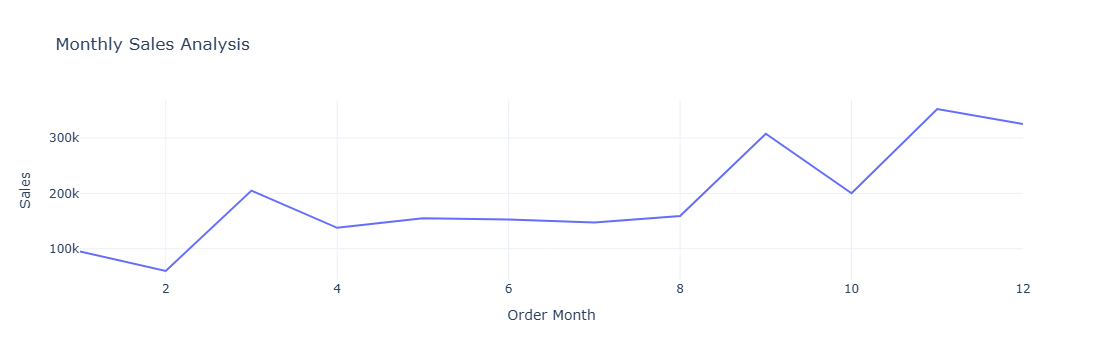

In [43]:

## Calculating Sales by Month using GroupBy

sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()

fig = px.line(sales_by_month, 
              x = 'Order Month', 
              y = 'Sales', 
              title = 'Monthly Sales Analysis')
fig.show()

# Data Grouping :
# data.groupby('Order Month')['Sales'].sum() - To calculate total sales per Month.
# .reset_index() - To keep the data in structured format.
# px.line : Line chart to show the Monthly sales trend.
# fig.show(): For Graph display.


## **2️⃣ Sales Analysis by Category**

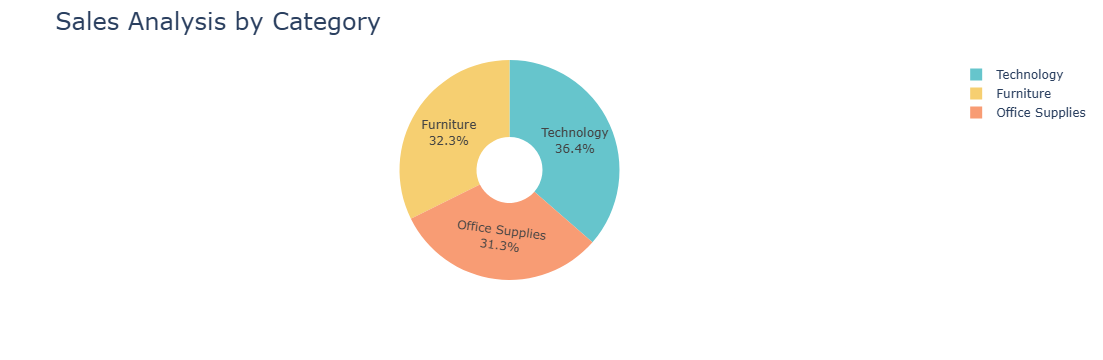

In [28]:

## Calculating Sales by Category using GroupBy

sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(sales_by_category, 
             values = 'Sales', 
             names = 'Category', 
             hole = 0.3, 
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text = 'Sales Analysis by Category', title_font = dict(size = 24))

fig.show()

# groupby('Category'): To calculate the Category-wise sales.
# Pie Chart :
# px.pie : To show the Sales proportions in pie chart.
# hole = 0.5 : To make Donut-style chart.
# Pastel Colors: To use soft color palette in the Chart.


## **3️⃣ Sales Analysis by Sub-Category**

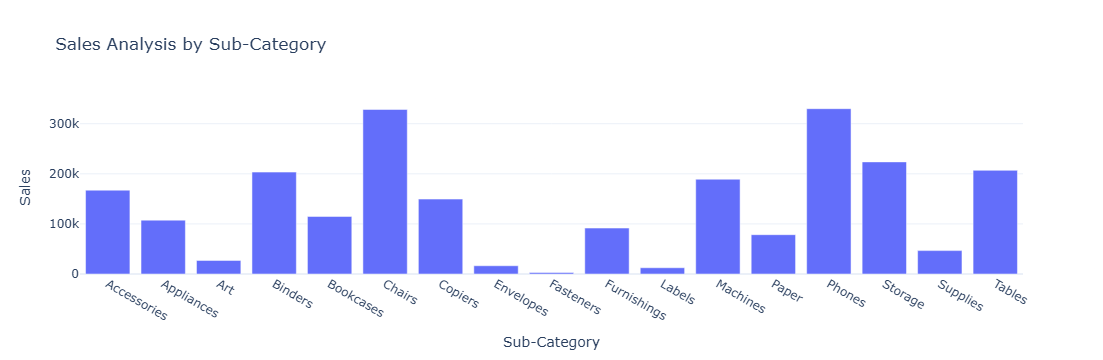

In [29]:

## Calculating Sales by Sub-Category using GroupBy

sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x = 'Sub-Category', 
             y = 'Sales', 
             title = 'Sales Analysis by Sub-Category')
fig.show()


## **4️⃣ Monthly Profit Analysis**

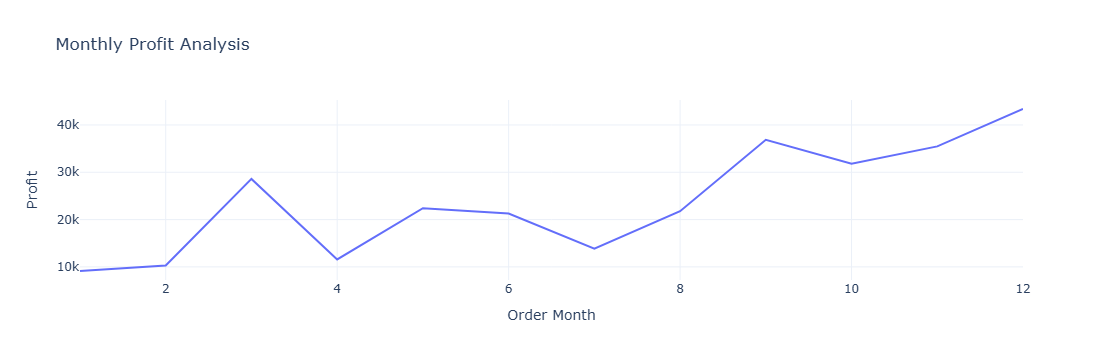

In [31]:

## Calculating Profits by Month

profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x = 'Order Month', 
              y = 'Profit', 
              title = 'Monthly Profit Analysis')
fig.show()


## **5️⃣ Profit Analysis by Category**

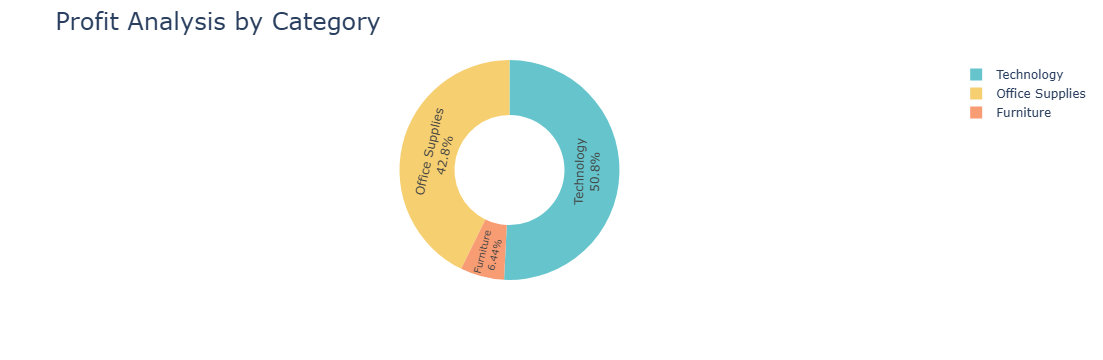

In [32]:

## Calculating Profits by Category

profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values = 'Profit', 
             names = 'Category', 
             hole = 0.5, 
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text = 'Profit Analysis by Category', title_font = dict(size = 24))

fig.show()


## **6️⃣ Profit Analysis by Sub-Category**

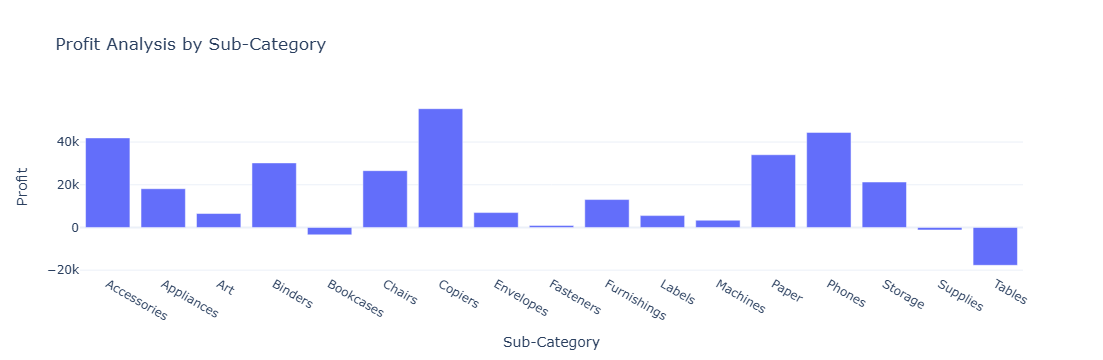

In [33]:

## Calculating Profits by Sub-Category

profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x = 'Sub-Category', 
             y = 'Profit', 
             title = 'Profit Analysis by Sub-Category')
fig.show()


## **7️⃣ Sales and Profit Analysis by Customer Segment**

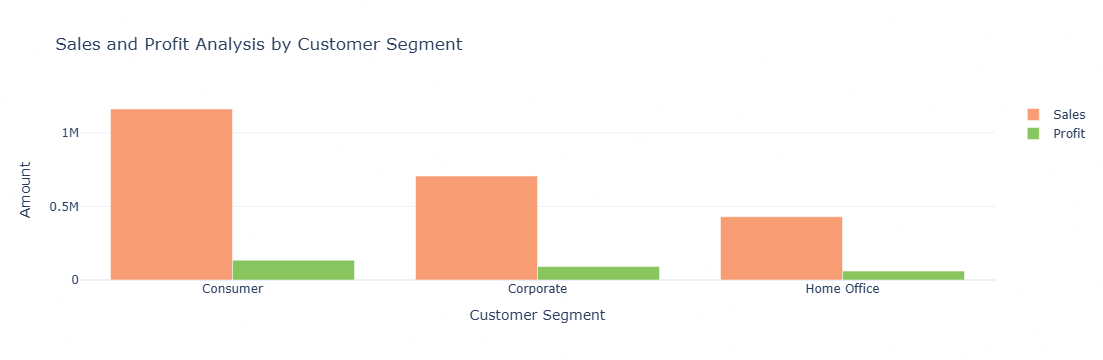

In [36]:



sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'], 
                     y = sales_profit_by_segment['Sales'], 
                     name = 'Sales',
                     marker_color = color_palette[2]))

fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'], 
                     y = sales_profit_by_segment['Profit'], 
                     name = 'Profit',
                     marker_color = color_palette[4]))

fig.update_layout(title = 'Sales and Profit Analysis by Customer Segment',
                  xaxis_title = 'Customer Segment', yaxis_title = 'Amount')

fig.show()


## **8️⃣ Analyse Sales-to-Profit Ratio**

In [40]:

sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

sales_profit_by_segment['Sales_to_Profit_Ratio'] = round((sales_profit_by_segment['Sales'] / 
                                                          sales_profit_by_segment['Profit']), 1)

print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])


       Segment  Sales_to_Profit_Ratio
0     Consumer                    8.7
1    Corporate                    7.7
2  Home Office                    7.1


### **🔸 Insights**
---

#### **Monthly Sales Analysis**
- ##### November and December recorded the highest sales, largely due to holiday and festive discounts.
- ##### January and February had the lowest sales, indicating weak post-festival demand.

#### **Category-wise Sales Analysis**
- ##### Among all categories, Technology generated the highest total sales, followed by Furniture, and then Office Supplies.
- ##### However, Furniture had high sales volume but lower margins compared to Technology.

#### **Sub-Category Sales Analysis**
- ##### The Top 3 sub-categories in sales were Phones, Chairs, and Storage.
- ##### Fasteners, Labels, and Envelopes had the lowest sales contribution.

#### **Monthly Profit Analysis**
- ##### Profit peaked in November, matching the highest sales month — meaning discounts didn’t eat margins there.
- ##### December had high sales but slightly reduced profit, likely due to aggressive discounting.
- ##### February and January showed the lowest profit, aligning with low sales volumes.

#### **Profit by Category & Sub-Category**
- ##### Technology dominates in both sales and profit.
- ##### Furniture shows high sales but inconsistent profits, implying cost or pricing inefficiency.
- ##### **Sub-category level** :
  - ##### Phones and Copiers generate the highest profit.
  - ##### Tables and Bookcases cause losses — possibly due to high shipping or discount costs.

#### **Sales & Profit by Segment**
- ##### Consumer Segment has the largest sales volume, contributing the most to revenue.
- ##### Corporate Segment shows a higher profit ratio relative to sales — indicating better pricing discipline.
- ##### Home Office segment lags behind in both.

#### **Sales-to-Profit Ratio**
- ##### The average sales-to-profit ratio is around 13:1, meaning for every ₹13 in sales, the business earns ₹1 profit.
- ##### Ratios vary by product line — Technology has the most favorable ratio, while Furniture lags due to high costs.



#### **🔸 Final Business Summary**

- ##### The business is healthy but seasonally dependent.
- ##### Technology is the clear growth driver.
- ##### Furniture needs profitability optimization.
- ##### November is the golden month for both sales and profit.
- ##### Expanding Corporate partnerships and technology inventory could maximize returns.

---

### By - **Sandeep Singh Yadav**
- #### **🔗 GitHub - https://github.com/ViaSandeep/**
- #### **🔗 LinkedIn - www.linkedin.com/in/viasandeep**

### **Thank You !**